In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv('Final_data.csv')


In [100]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.50,1.62,0.74,0.84,725.10,47.78,685.16,72604254381420232704.00,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.50,1.51,0.55,0.73,-232.91,40.81,978.62,102050570044360998912.00,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.50,1.66,0.57,0.71,805.74,44.64,654.53,107960708814109687808.00,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.50,0.86,0.74,0.81,1206.21,63.01,773.63,89879211568990568448.00,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.50,2.54,0.67,0.79,303.60,43.35,711.42,52646848199189766144.00,Low


In [101]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method',
       'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets',
       'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg',
       'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn',
       'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin'],
      dtype='object')

In [102]:
df['Daily meals frequency'].unique()

array([2.99, 3.01, 1.99, 3.  , 2.02, 3.98, 2.  , 1.98, 3.02, 2.01, 4.02,
       3.03, 2.04, 4.01, 2.98, 3.99, 4.  , 4.03, 1.97, 2.97, 2.03, 3.97,
       1.96, 3.04, 3.96, 2.96, 2.95, 4.04, 3.05, 1.95, 3.95])

In [103]:
df['meal_type'].value_counts()

meal_type
Lunch        5047
Dinner       5011
Breakfast    4981
Snack        4961
Name: count, dtype: int64

In [104]:
df['diet_type'].value_counts()

diet_type
Paleo         3403
Low-Carb      3379
Vegetarian    3337
Keto          3324
Vegan         3323
Balanced      3234
Name: count, dtype: int64

In [105]:
print(df[['Proteins', 'sugar_g', 'Fats', 'Calories']].describe())

       Proteins  sugar_g     Fats  Calories
count  20000.00 20000.00 20000.00  20000.00
mean      99.92    24.53    66.61   2024.42
std       22.04    14.45    14.70    541.89
min       55.17    -0.67    36.59    781.00
25%       83.04    11.99    55.34   1634.00
50%       97.15    24.06    64.77   1919.00
75%      113.64    37.49    75.75   2360.00
max      185.34    50.51   123.42   3641.00


In [106]:
def define_healty(row):

    score=0

    if row['Proteins'] >= 15:
        score += 1
    if row['Fats'] <= 20:
        score += 1  
    if row['sugar_g'] < 15:
        score += 1
    if row['Calories'] <= 600:
        score += 1

    if score >= 2:
        return 1 # Sağlıklı (Sınıfın en iyileri)
    else:
        return 0 # Sağlıksız (Vasatlar)
    

df['is_healthy'] = df.apply(define_healty, axis=1)

df['is_healthy'].value_counts()

features = [
    'Calories', 
    'Proteins', 
    'Carbs', 
    'Fats', 
    'sugar_g', 
    'diet_type' # Keto, Vegan vs. (Kategorik, işimize yarar)
]

X = df[features]
y = df['is_healthy']  # 0-4 arası skorlar

X = pd.get_dummies(X, columns=['diet_type'], drop_first=True)

In [107]:
df['is_healthy'].value_counts()

is_healthy
0    13936
1     6064
Name: count, dtype: int64

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.99975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2769
           1       1.00      1.00      1.00      1231

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

[[2769    0]
 [   1 1230]]


Text(0.5, 23.52222222222222, 'Predicted')

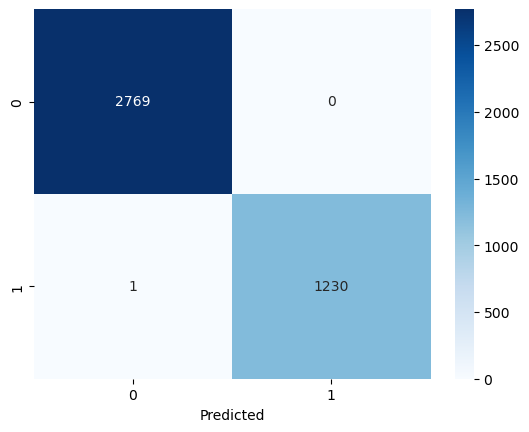

In [109]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')

In [111]:
import joblib

joblib.dump(rf, 'nutriFit_model.pkl')
joblib.dump(list(X.columns), 'model_columns.pkl')

menu_df = df[['meal_name', 'Calories', 'Proteins', 'Carbs', 'Fats', 'sugar_g', 'diet_type']].drop_duplicates()
menu_df.to_csv('menu_data.csv', index=False)
print(" BAŞARILI! 'nutriFit_model.pkl', 'model_columns.pkl' ve 'menu_data.csv' oluşturuldu.")

 BAŞARILI! 'nutriFit_model.pkl', 'model_columns.pkl' ve 'menu_data.csv' oluşturuldu.
